In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('pdf', fonttype=42)
sns.set(font_scale=1.25, style='whitegrid')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#df_plotPenalty = pd.read_csv("blackboxTIRMOO.csv")
df_plotPenalty = pd.read_csv("gpem_results.csv")
fname = "tirmoo"

f = open("points_dataset")
datasets = [l.strip() for l in f.readlines()]
f.close()

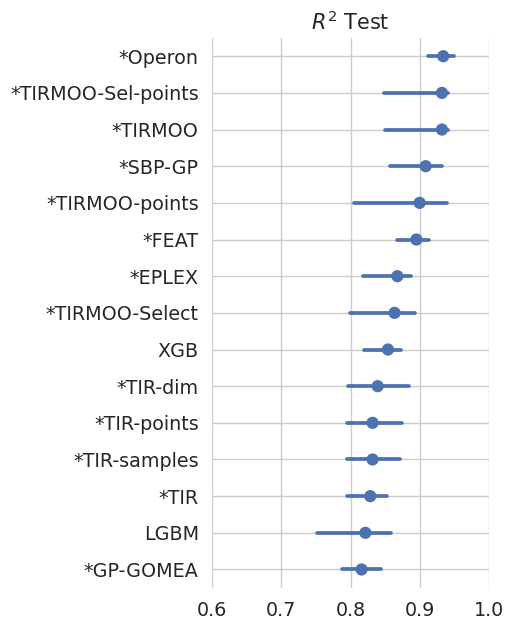

In [2]:
# Make the PairGrid
sns.set_style("whitegrid")


# different options
x_vars=[
        'r2_test',
        #'rmse_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty
#dfg = df_p[df_p.algorithm == 'TIRMOO2'].groupby('dataset')[x_vars[0]].median()
#df_p = df_p[df_p.dataset.isin(dfg.index)]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      #size=10,
      orient="h",
      #jitter=False,
      order=order,
      palette="rocket",
      #linewidth=1,
      #markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      errorbar=('ci', 95)
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','$R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([.6,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig(f"figs/{fname}_results.pdf", bbox_inches='tight')


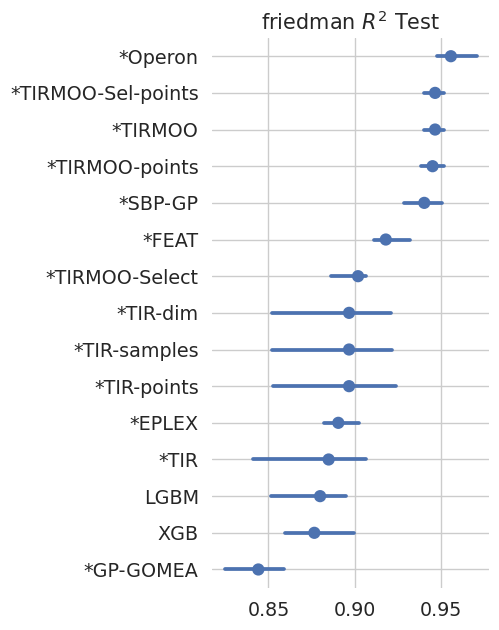

In [3]:
# Make the PairGrid
sns.set_style("whitegrid")

# different options
x_vars=[
        'r2_test',
        #'log_mse_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty[df_plotPenalty.dataset.str.contains("_fri_")]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      #size=10,
      orient="h",
      #jitter=False,
      order=order,
      palette="rocket",
      #linewidth=1,
      #markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      errorbar=('ci', 95)
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig(f"figs/{fname}_fri_results.pdf", bbox_inches='tight')

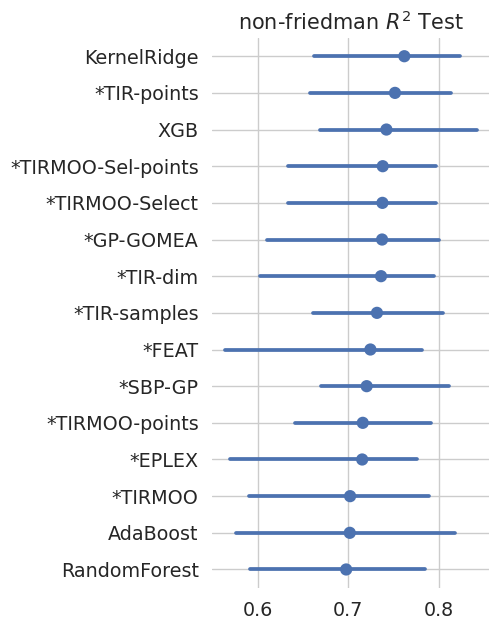

In [4]:
# Make the PairGrid
sns.set_style("whitegrid")

#smallests = ["192_vineyard", "228_elusage", "485_analcatdata_vehicle", "1096_FacultySalaries", 
#             "523_analcatdata_neavote", "663_rabe_266", "687_sleuth_ex1605", "659_sleuth_ex1714",
#             "678_visualizing_environmental", "611_fri_c3_100_5", "594_fri_c2_100_5", "624_fri_c0_100_5",
#             "656_fri_c1_100_5", "210_cloud", "706_sleuth_case1202", "1089_USCrime", "712_chscase_geyser1",
#             "542_pollution", "527_analcatdata_election2000"]


# different options
x_vars=[
        'r2_test',
        #'log_mse_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty[~df_plotPenalty.dataset.str.contains("_fri_")]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      #size=10,
      orient="h",
      #jitter=False,
      order=order,
      palette="rocket",
      #linewidth=1,
      #markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      errorbar=('ci', 95)
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','non-friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig(f"figs/{fname}_nonfri_results.pdf", bbox_inches='tight')

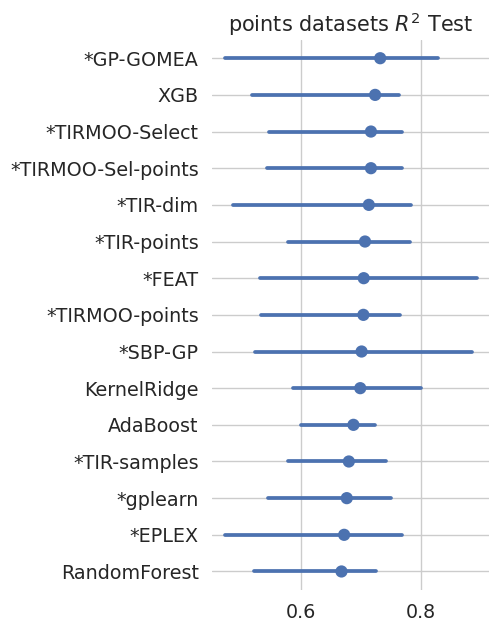

In [5]:
# Make the PairGrid
sns.set_style("whitegrid")

#smallests = ["192_vineyard", "228_elusage", "485_analcatdata_vehicle", "1096_FacultySalaries", 
#             "523_analcatdata_neavote", "663_rabe_266", "687_sleuth_ex1605", "659_sleuth_ex1714",
#             "678_visualizing_environmental", "611_fri_c3_100_5", "594_fri_c2_100_5", "624_fri_c0_100_5",
#             "656_fri_c1_100_5", "210_cloud", "706_sleuth_case1202", "1089_USCrime", "712_chscase_geyser1",
#             "542_pollution", "527_analcatdata_election2000"]




# different options
x_vars=[
        'r2_test',
        #'log_mse_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty[df_plotPenalty.dataset.isin(datasets)]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      #size=10,
      orient="h",
      #jitter=False,
      order=order,
      palette="rocket",
      #linewidth=1,
      #markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      errorbar=('ci', 95)
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','points datasets $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig(f"figs/{fname}_points_results.pdf", bbox_inches='tight')

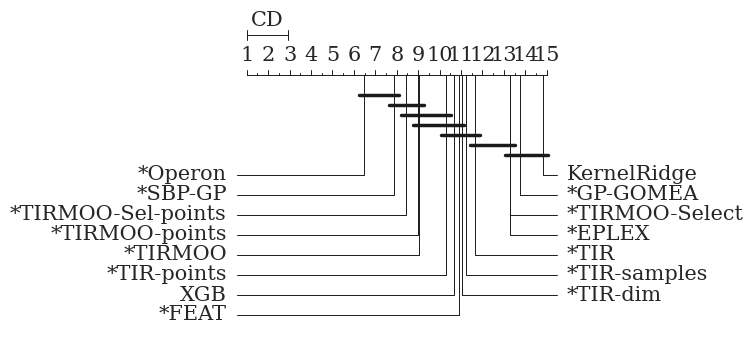

In [5]:
import Orange

# critical difference for Nemenyi with alpha=0.05
def cd_plot(df, pname):
    df_pivot = pd.pivot_table(df, index='algorithm', columns=['dataset'], values='r2_test')
    n = len(df_pivot.columns)
    ranks = df_pivot.rank(ascending=False).mean(axis=1).sort_values(ascending=True)    
    names = ranks.index.values[:15]
    avranks = ranks.values[:15]
    
    cd = Orange.evaluation.compute_CD(avranks, n)
    Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
    plt.savefig(pname, bbox_inches='tight')
        
cd_plot(df_plotPenalty, f"figs/{fname}_cd_results.pdf")

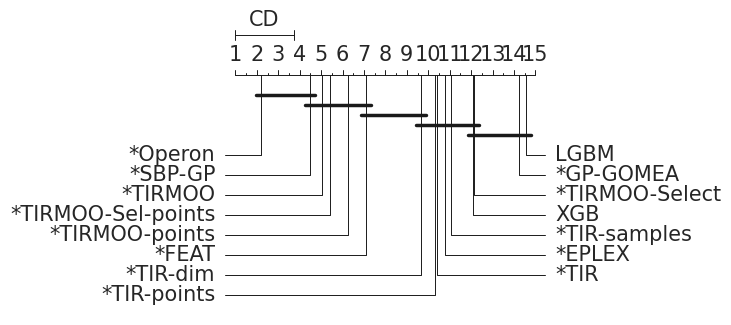

In [7]:
cd_plot(df_plotPenalty[df_plotPenalty.dataset.str.contains("_fri_")], f"figs/{fname}_cd_fri_results.pdf")

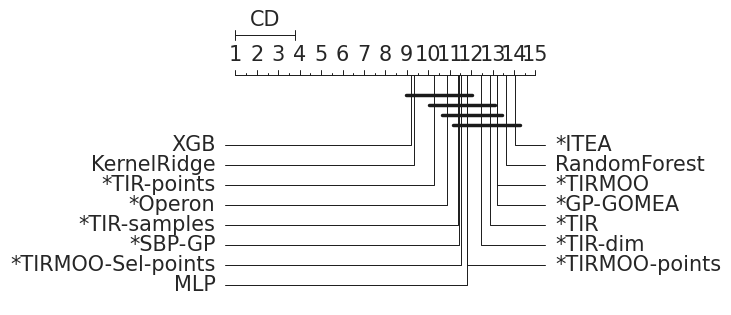

In [8]:
cd_plot(df_plotPenalty[~df_plotPenalty.dataset.str.contains("_fri_")],f"figs/{fname}_cd_nonfri_results.pdf")


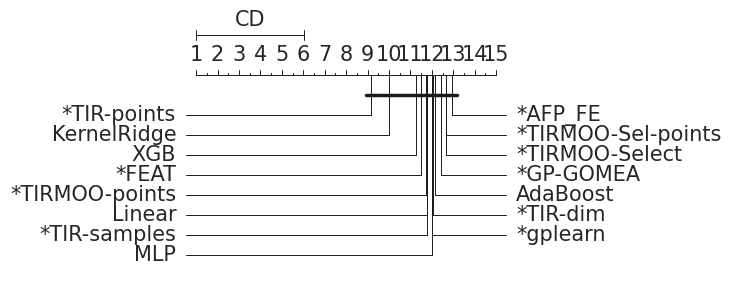

In [9]:
cd_plot(df_plotPenalty[df_plotPenalty.dataset.isin(datasets)],f"figs/{fname}_cd_points_results.pdf")


In [10]:
# taken from srbench analysis scripts
def check_dominance(p1,p2):

    flag1 = 0
    flag2 = 0

    for o1,o2 in zip(p1,p2):
        if o1 < o2:
            flag1 = 1
        elif o1 > o2:
            flag2 = 1

    if flag1==1 and flag2 == 0:
        return 1
    elif flag1==0 and flag2 == 1:
        return -1
    else:
        return 0

def front(obj1,obj2):
    """return indices from x and y that are on the Pareto front."""
    rank = []
    assert(len(obj1)==len(obj2))
    n_inds = len(obj1)
    front = []

    for i in np.arange(n_inds):
        p = (obj1[i],obj2[i])
        dcount = 0
        dom = []
        for j in np.arange(n_inds):
            q = (obj1[j],obj2[j])
            compare = check_dominance(p,q)
            if compare == 1:
                dom.append(j)
#                 print(p,'dominates',q)
            elif compare == -1:
                dcount = dcount +1
#                 print(p,'dominated by',q)

        if dcount == 0:
#             print(p,'is on the front')
            front.append(i)

#     f_obj1 = [obj1[f] for f in front]
    f_obj2 = [obj2[f] for f in front]
#     s1 = np.argsort(np.array(f_obj1))
    s2 = np.argsort(np.array(f_obj2))
#     front = [front[s] for s in s1]
    front = [front[s] for s in s2]

    return front

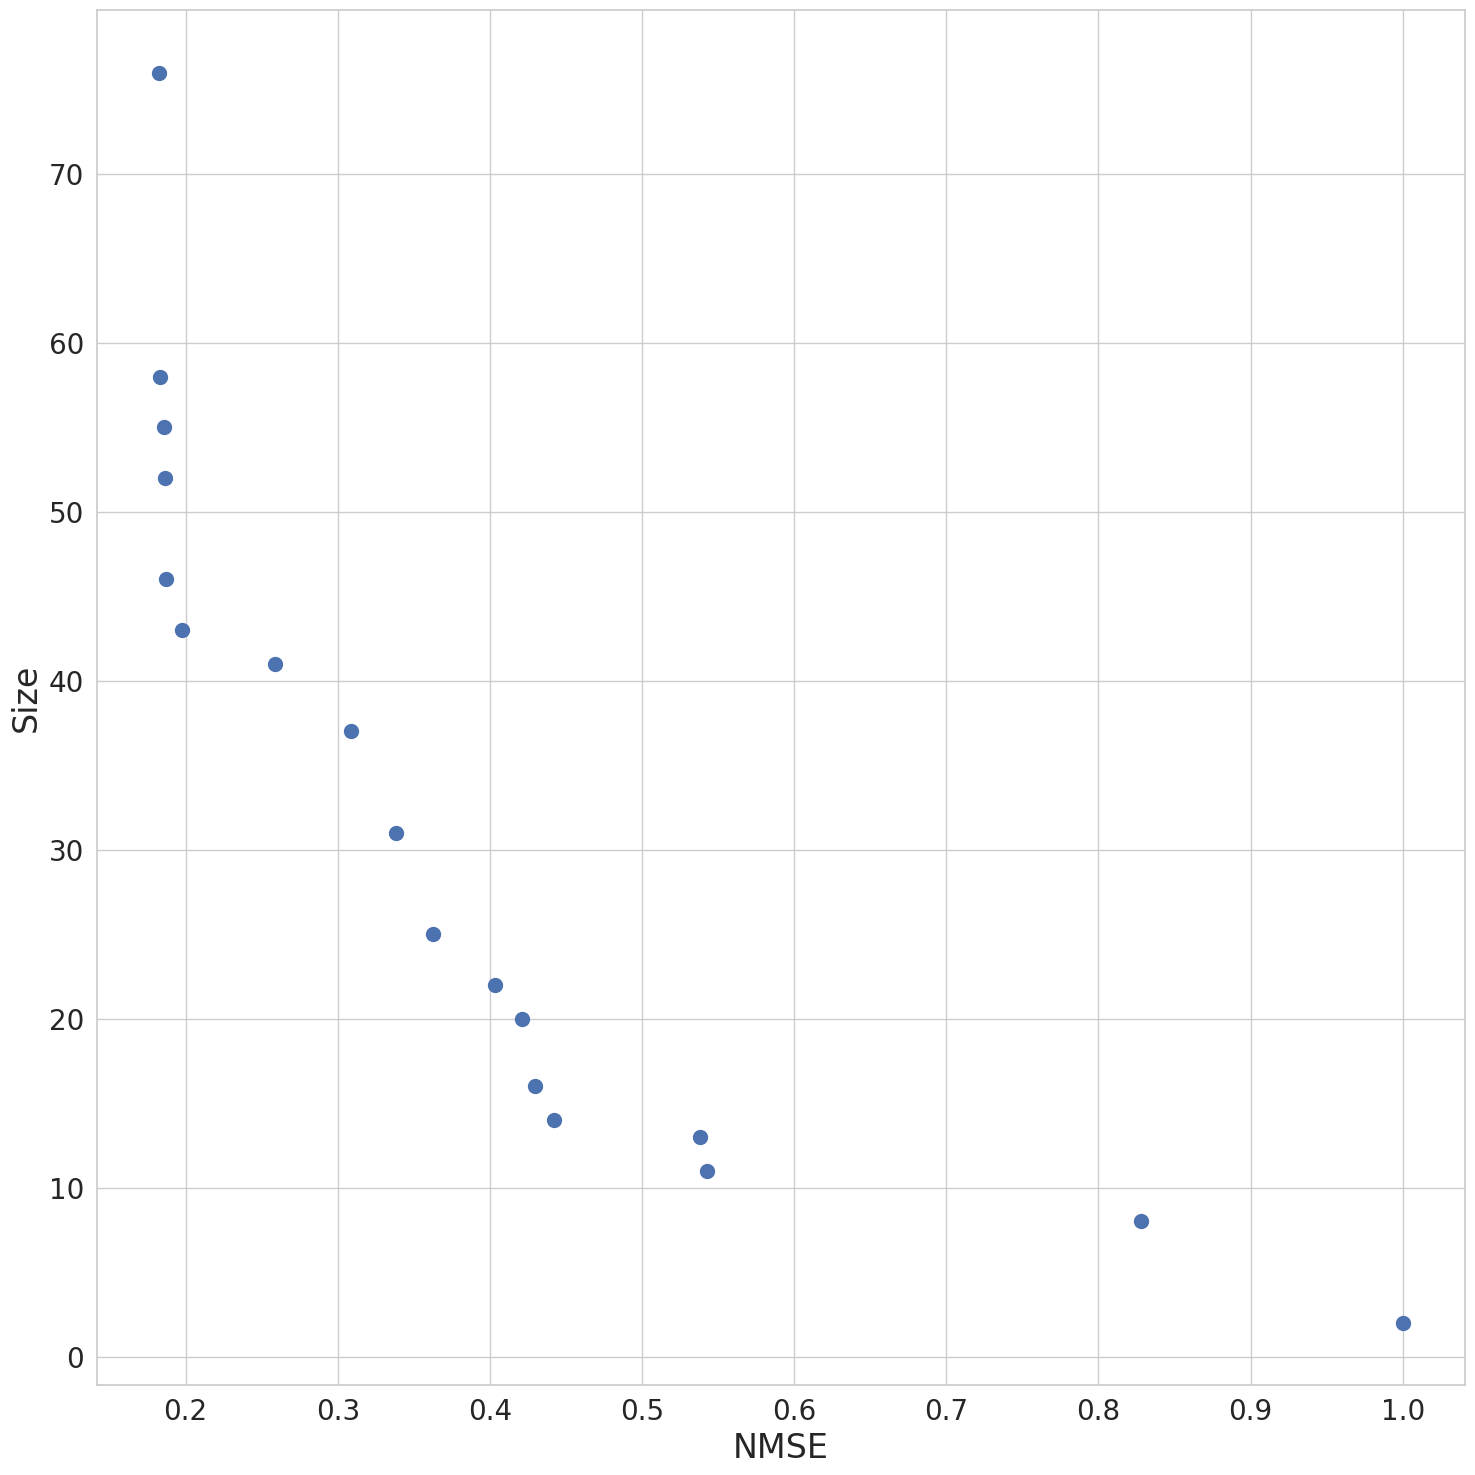

In [11]:
lines = open("front.csv").readlines()

def extract_objs(x):
    objs = x.split()[0].split(',')
    return float(objs[0][1:]), float(objs[1][:-1])

zs = [extract_objs(z) for z in lines]
x = np.array([z[0] for z in zs])
y = np.array([z[1] for z in zs])

ix = front(x,y)

plt.figure(figsize=(15,15))
plt.plot(x[ix], y[ix], '.', markersize=20)
plt.xlabel("NMSE", fontsize=24)
plt.ylabel("Size", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
#plt.show()
plt.savefig("figs/pareto.pdf")

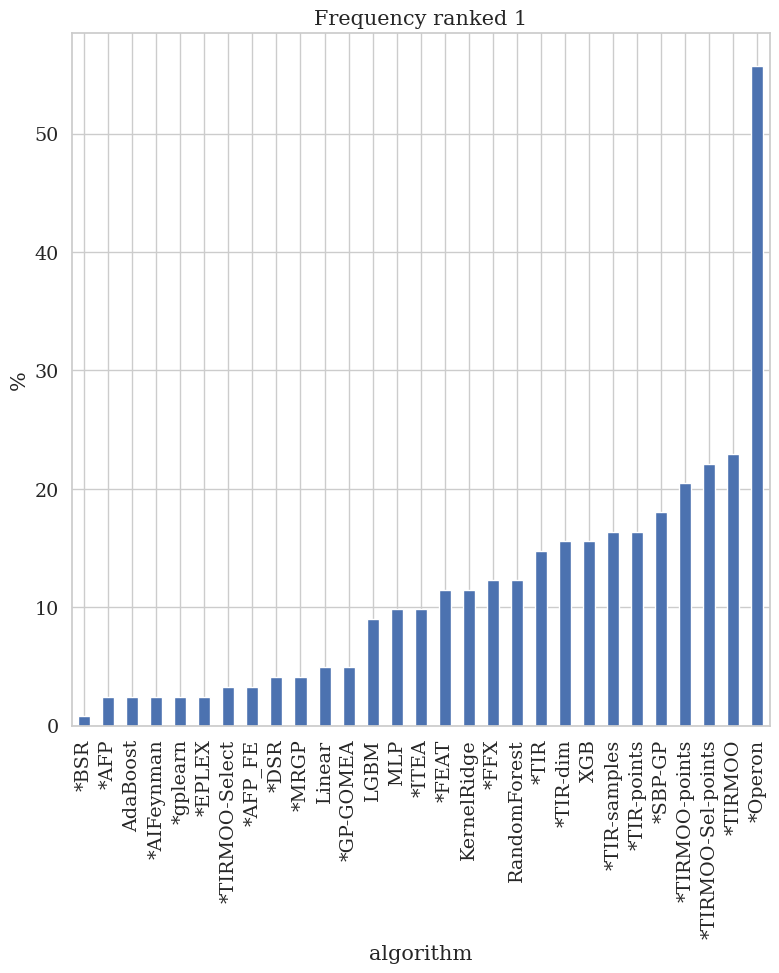

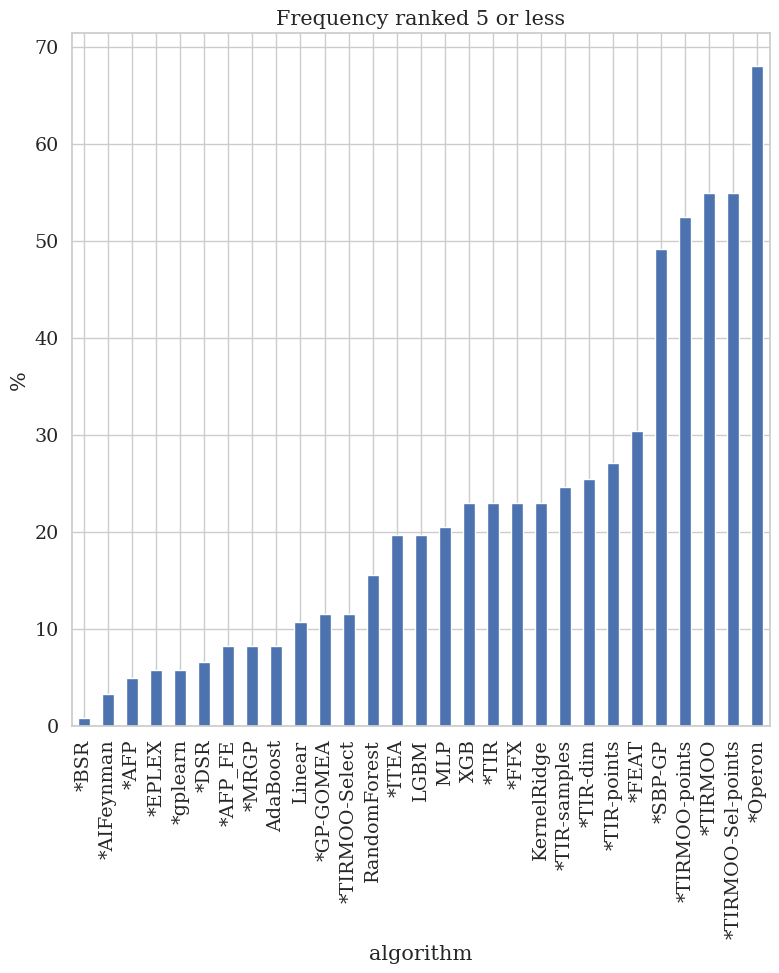

In [2]:
df_pivot = pd.pivot_table(df_plotPenalty, index='algorithm', columns=['dataset'], values='r2_test').apply(lambda x: np.round(x,2))
ranks = df_pivot.rank(ascending=False, method='min')
plt.rcParams.update({'font.size': 30, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})
n = len(ranks.columns)

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 2 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 1')
plt.savefig('figs/hist1.pdf', bbox_inches="tight")

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 5 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 5 or less')
plt.savefig('figs/hist5.pdf', bbox_inches="tight")

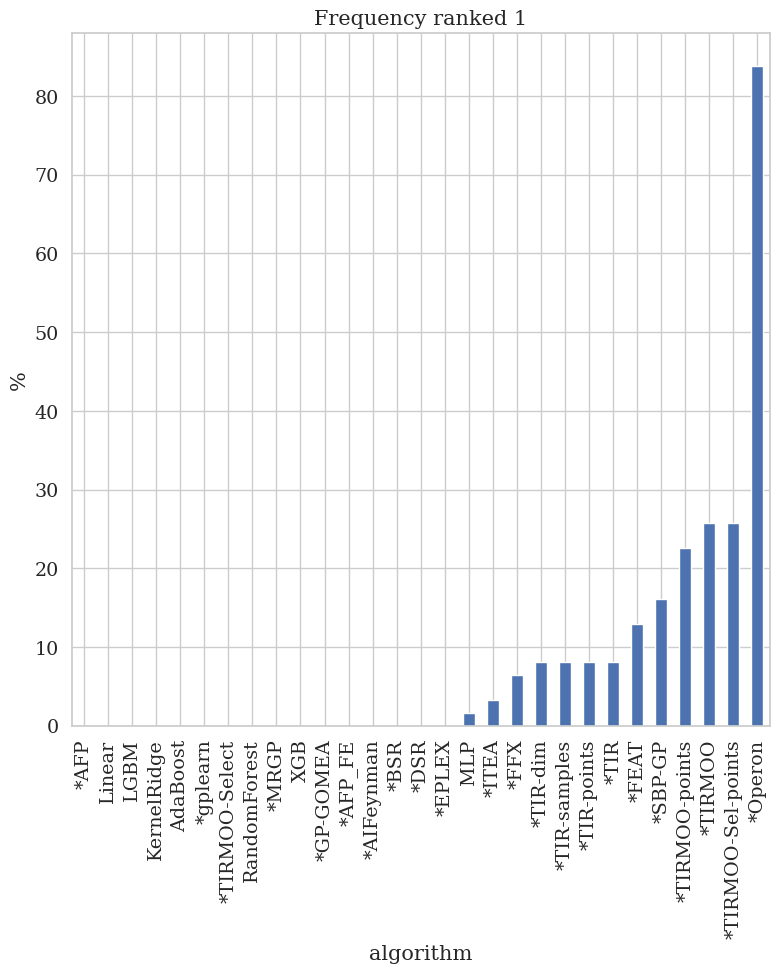

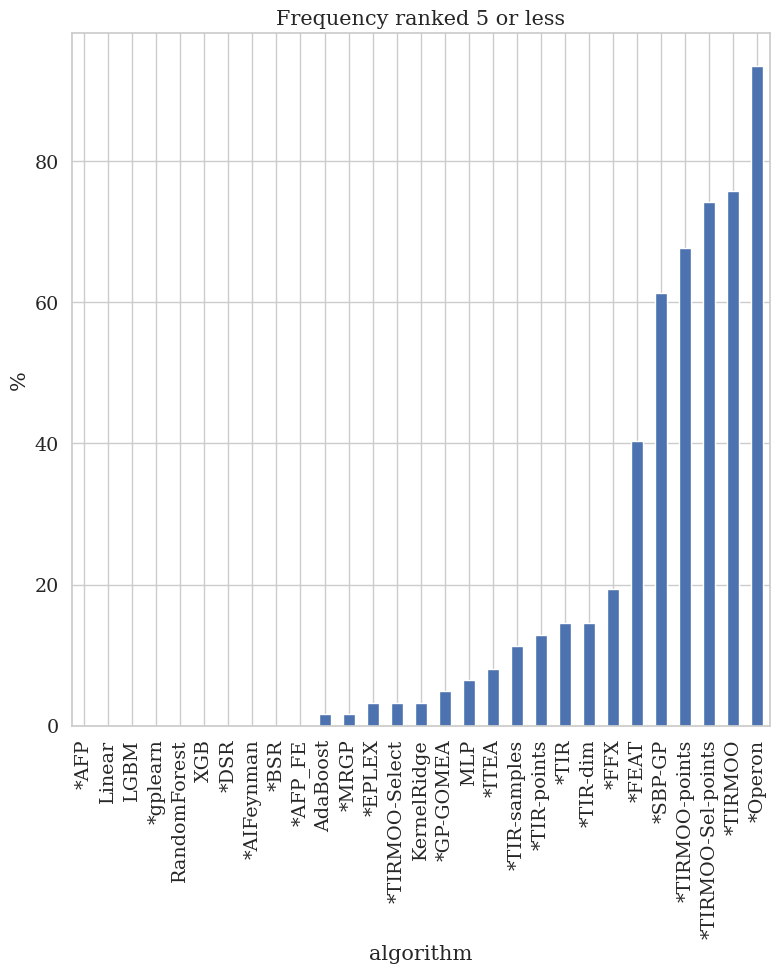

In [3]:
df_pivot = pd.pivot_table(df_plotPenalty[df_plotPenalty.dataset.str.contains("_fri_")], index='algorithm', columns=['dataset'], values='r2_test').apply(lambda x: np.round(x,2))
ranks = df_pivot.rank(ascending=False, method='min')
plt.rcParams.update({'font.size': 30, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})
n = len(ranks.columns)

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 2 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 1')
plt.savefig('figs/hist1fri.pdf', bbox_inches="tight")

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 5 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 5 or less')
plt.savefig('figs/hist5fri.pdf', bbox_inches="tight")

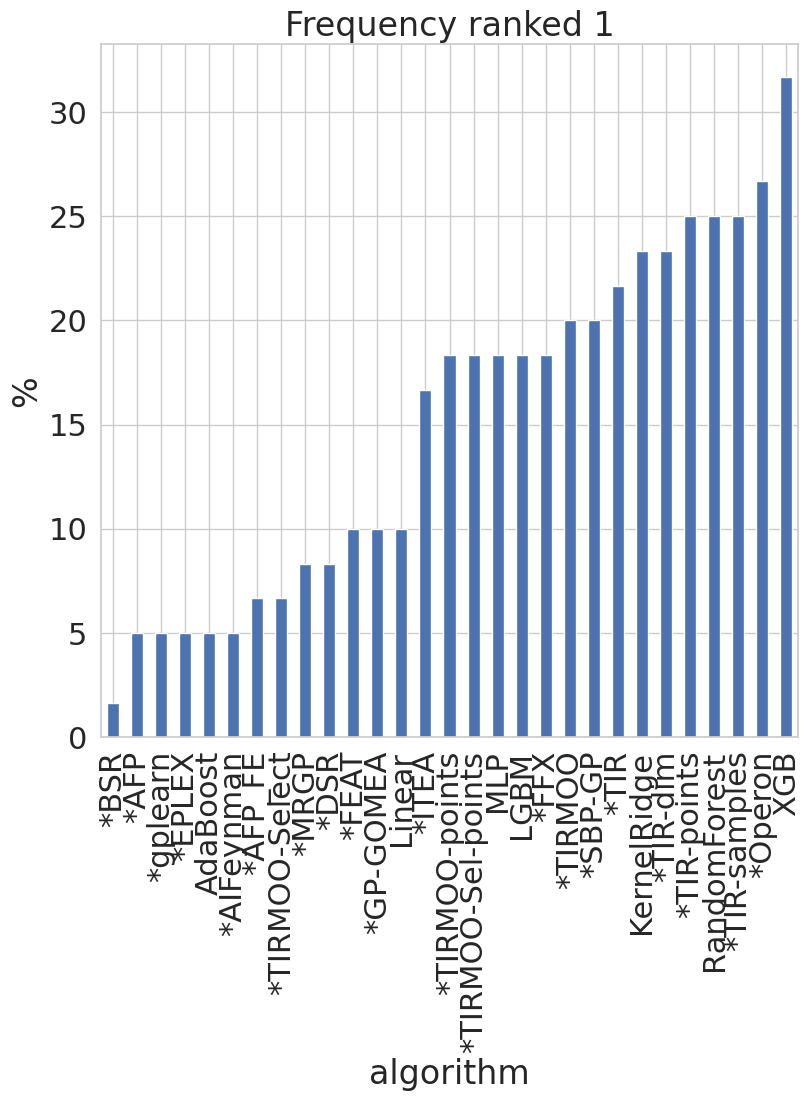

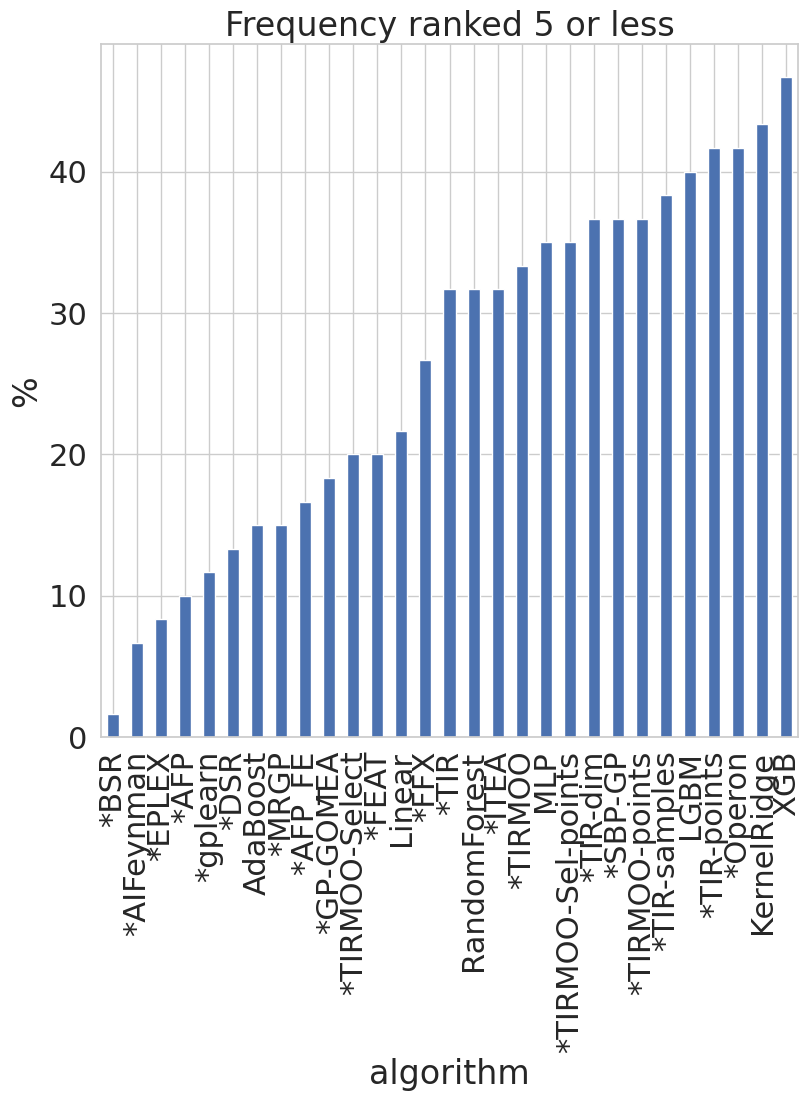

In [4]:
df_pivot = pd.pivot_table(df_plotPenalty[~df_plotPenalty.dataset.str.contains("_fri_")], index='algorithm', columns=['dataset'], values='r2_test').apply(lambda x: np.round(x,2))
ranks = df_pivot.rank(ascending=False, method='min')
plt.rcParams.update({'font.size': 30, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})
sns.set(font_scale=2)
sns.set_style("whitegrid")
n = len(ranks.columns)

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 2 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 1')
plt.savefig('figs/hist1nonfri.pdf', bbox_inches="tight")

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 5 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 5 or less')
plt.savefig('figs/hist5nonfri.pdf', bbox_inches="tight")

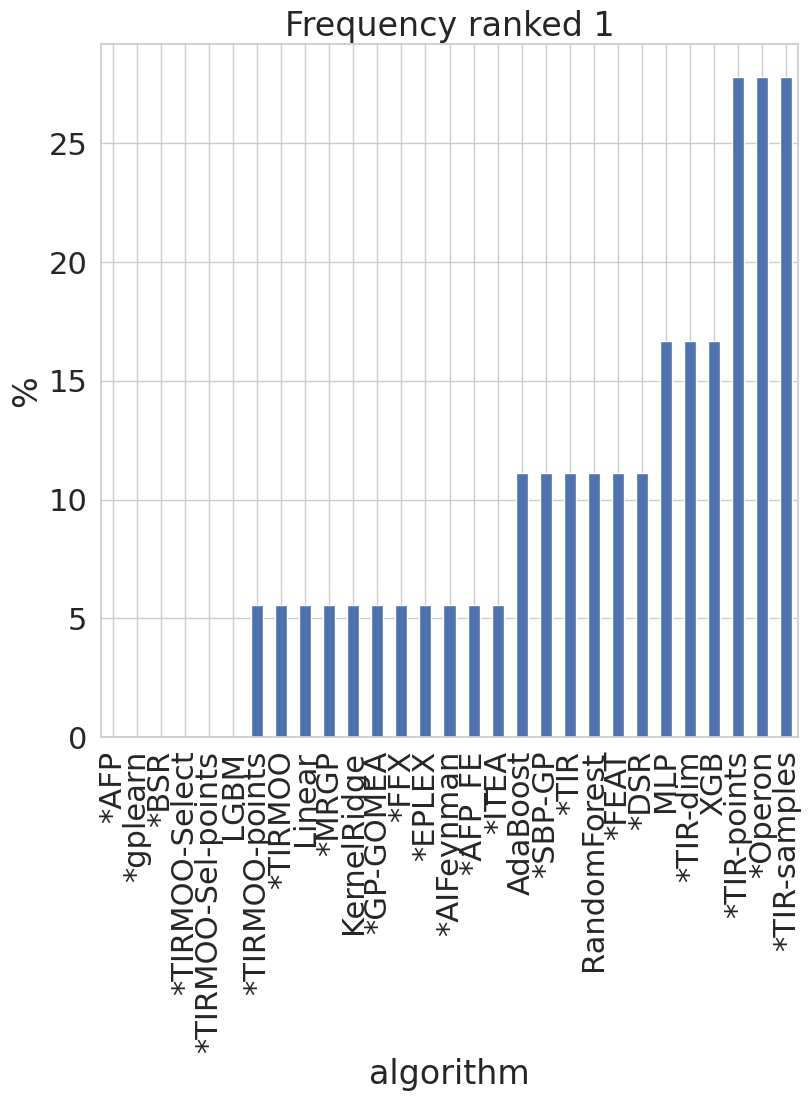

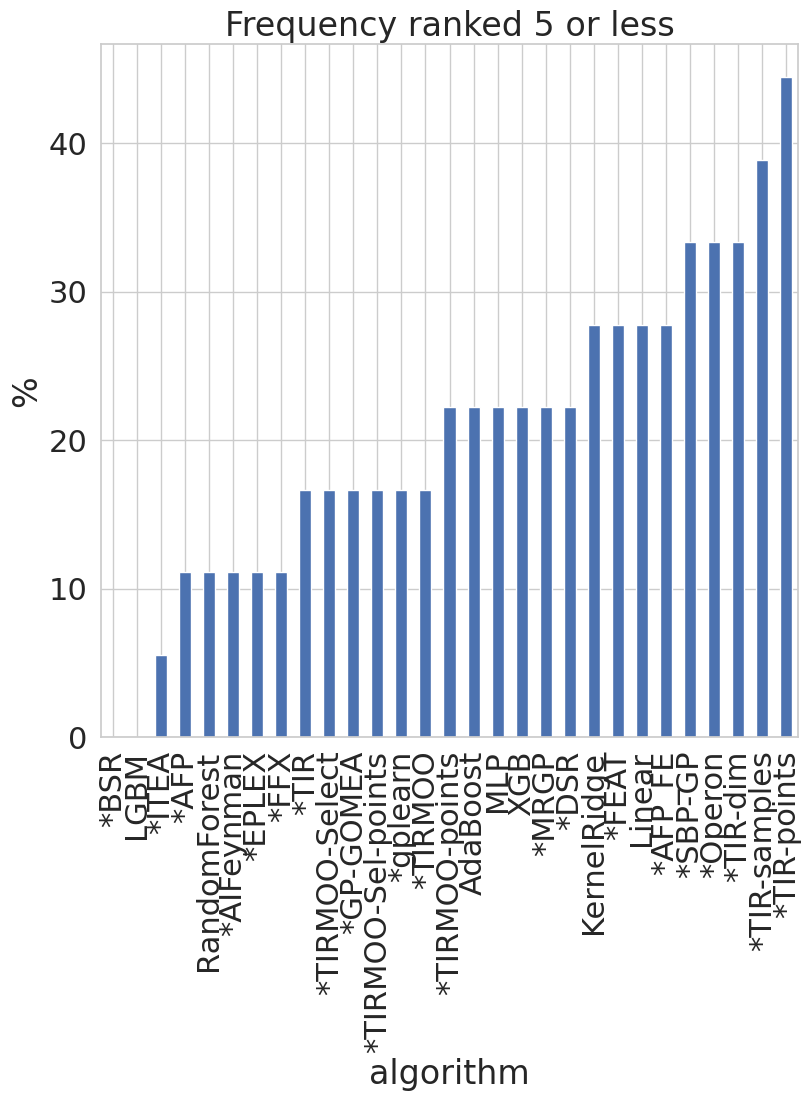

In [7]:
df_pivot = pd.pivot_table(df_plotPenalty[df_plotPenalty.dataset.isin(datasets)], index='algorithm', columns=['dataset'], values='r2_test').apply(lambda x: np.round(x,2))
ranks = df_pivot.rank(ascending=False, method='min')
plt.rcParams.update({'font.size': 30, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})
sns.set(font_scale=2)
sns.set_style("whitegrid")
n = len(ranks.columns)

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 2 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 1')
plt.savefig('figs/hist1points.pdf', bbox_inches="tight")

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 5 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 5 or less')
plt.savefig('figs/hist5points.pdf', bbox_inches="tight")

<Axes: title={'center': 'model_size'}, xlabel='algorithm'>

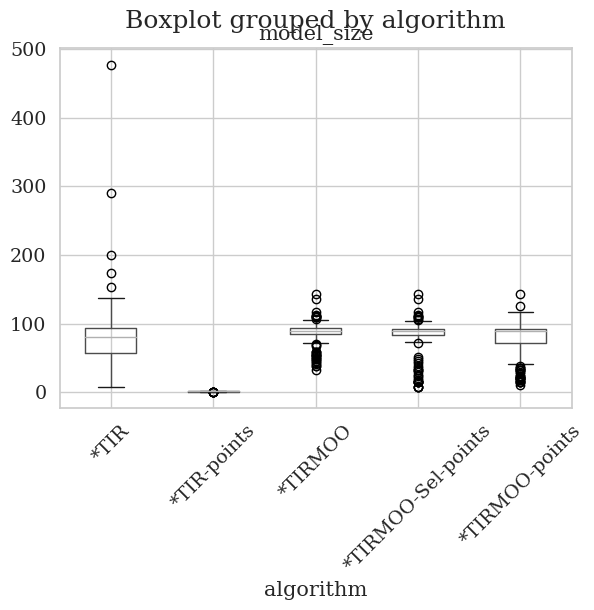

In [4]:
(df_plotPenalty[df_plotPenalty.algorithm.isin(['*TIR', '*TIR-points', '*TIRMOO', '*TIRMOO-points', '*TIRMOO-Selection', '*TIRMOO-Sel-points'])]
 .boxplot('model_size', by='algorithm', rot=45))

In [11]:
df_plotPenalty[df_plotPenalty.algorithm == "*TIR-points"].model_size

2671    0.8585
2674    0.3493
2677    0.5377
2680    0.3716
2683    0.8198
         ...  
3022    0.8369
3025    0.6822
3028    0.7733
3031    0.6615
3034    0.2907
Name: model_size, Length: 122, dtype: float64